In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv(r"C:\Users\ragha\OneDrive\Desktop\internship ml\seismic-bumps.csv")

In [3]:
data.head()

,id,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,1,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,2,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,3,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,4,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,5,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data.isnull().any()

id                False
seismic           False
seismoacoustic    False
shift             False
genergy           False
gpuls             False
gdenergy          False
gdpuls            False
ghazard           False
nbumps            False
nbumps2           False
nbumps3           False
nbumps4           False
nbumps5           False
nbumps6           False
nbumps7           False
nbumps89          False
energy            False
maxenergy         False
class             False
dtype: bool

In [5]:
data.columns

Index(['id', 'seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls',
       'gdenergy', 'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3',
       'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy',
       'maxenergy', 'class'],
      dtype='object')

In [6]:
data['seismic'].unique()

array(['a', 'b'], dtype=object)

In [7]:
data['ghazard'].unique()

array(['a', 'b', 'c'], dtype=object)

In [8]:
data['seismoacoustic'].unique()

array(['a', 'b', 'c'], dtype=object)

In [9]:
data['shift'].unique()

array(['N', 'W'], dtype=object)

In [10]:
from collections import Counter as c
data['class'].value_counts()

0    2414
1     170
Name: class, dtype: int64

In [11]:
le=LabelEncoder()
data['seismic']=le.fit_transform(data['seismic'])
data['ghazard']=le.fit_transform(data['ghazard'])
data['seismoacoustic']=le.fit_transform(data['seismoacoustic'])
data['shift']=le.fit_transform(data['shift'])

In [12]:
data.head()

,id,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,1,0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,14720,33,-70,-79,0,1,0,1,0,0,0,0,0,2000,2000,0
2,3,0,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,28820,171,-23,40,0,1,0,1,0,0,0,0,0,3000,3000,0
4,5,0,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
data.shape

(2584, 20)

In [14]:
x=data.iloc[:,1:19]
y=data.iloc[:,19:20]

In [15]:
x.shape

(2584, 18)

In [16]:
y.shape

(2584, 1)

In [17]:
x.shape

(2584, 18)

In [18]:
from collections import Counter as c
data.value_counts()

id    seismic  seismoacoustic  shift  genergy  gpuls  gdenergy  gdpuls  ghazard  nbumps  nbumps2  nbumps3  nbumps4  nbumps5  nbumps6  nbumps7  nbumps89  energy  maxenergy  class
2584  0        0               1      12750    235    -10       -10     0        0       0        0        0        0        0        0        0         0       0          0        1
888   0        0               1      105160   284     34        66     0        1       0        1        0        0        0        0        0         6000    6000       0        1
866   0        0               1      54980    115    -72       -66     0        1       1        0        0        0        0        0        0         600     600        0        1
865   0        0               1      154470   263    -21       -24     0        3       1        2        0        0        0        0        0         8400    6000       0        1
864   0        0               1      122030   211    -42       -42     0        1       1

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
print(x_train.shape)
print(x_test.shape)

(2067, 18)
(517, 18)


In [21]:
print(y_train.shape)

(2067, 1)


In [22]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ragha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
pred=lr.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
r2_scor = r2_score(y_test, pred)
print("r2_score:",r2_scor)

accuracy = accuracy_score(y_test, pred)
print("accuracy(in %):",accuracy*100)

r2_score: -0.7585034013605436
accuracy(in %): 91.29593810444874


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[472,  18],
       [ 27,   0]], dtype=int64)

In [26]:
import sklearn.metrics as metrics
lrsfpr,lrstpr,threshold=metrics.roc_curve(y_test,pred)
lrsroc_auc=metrics.auc(lrsfpr,lrstpr)

Text(0, 0.5, 'tpr')

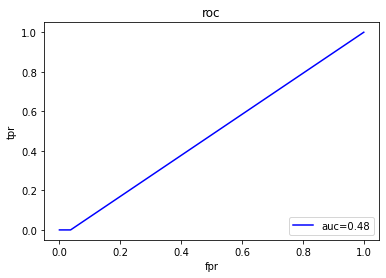

In [27]:
import matplotlib.pyplot as plt
plt.plot(lrsfpr,lrstpr,"b",label="auc=%0.2f"%lrsroc_auc)
plt.legend(loc='lower right')
plt.title("roc")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [28]:
svm = SVC(kernel = 'sigmoid')
svm.fit(x_train, y_train)
pred1=svm.predict(x_test)

C:\Users\ragha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
r2_scor1 = r2_score(y_test, pred1)
print("r2_score:",r2_scor1)

accuracy1 = accuracy_score(y_test, pred1)
print("accuracy(in %):",accuracy1*100)

r2_score: -0.44588057445200246
accuracy(in %): 92.84332688588007


In [31]:
import pickle
pickle.dump(lr,open('seismic.pkl','wb'))